In this example we are going to fetch GHI and Clearsky GHI for 5 days in the past for the Sydney Opera House.

In [20]:
from solcast import historic, forecast

To test the API you can use [unmetered locations](https://docs.solcast.com.au/?_gl=1*k80zyt*_ga*MzQ4NzM2ODEuMTY5MDI2MzUwOQ..*_ga_BYH3TC3R79*MTY5MjIzOTc0NS4xOC4xLjE2OTIyMzk3NzQuMC4wLjA.&_ga=2.240435015.595123581.1692145391-34873681.1690263509#unmetered-locations), in the sdk:

In [21]:
from solcast.unmetered_locations import UNMETERED_LOCATIONS
sydney = UNMETERED_LOCATIONS['Sydney Opera House']
SOLCAST_API_KEY = "gG8Ww216F5UzVYn5gm6ajBw5XlINl647"

We are going to use the `historic.radiation_and_weather` API:

In [22]:
help(historic.radiation_and_weather)

Help on function radiation_and_weather in module solcast.historic:

radiation_and_weather(latitude: float, longitude: float, start: str, end: str = None, duration: str = None, **kwargs) -> solcast.api.PandafiableResponse
    Get historical irradiance and weather estimated actuals for up to 31 days of data
    at a time for a requested location, derived from satellite (clouds and irradiance
    over non-polar continental areas) and numerical weather models (other data).
    Data is available from 2007-01-01T00:00Z up to real time estimated actuals.

    Args:
        latitude: in decimal degrees, between -90 and 90, north is positive
        longitude: in decimal degrees, between -180 and 180, east is positive
        start: datetime-like, first day of the requested period
        end: optional, datetime-like, last day of the requested period
        duration: optional, ISO_8601 compliant duration for the historic data.
            Must be within 31 days of the start_date.
        **kwa

In [12]:
help(forecast.rooftop_pv_power)

Help on function rooftop_pv_power in module solcast.forecast:

rooftop_pv_power(latitude: float, longitude: float, output_parameters: List[str], **kwargs) -> solcast.api.PandafiableResponse
    Get basic rooftop PV power forecasts from the present time up to 14 days ahead
    for the requested location, derived from satellite (clouds and irradiance
    over non-polar continental areas, nowcasted for approx. four hours ahead)
    and numerical weather models (other data and longer horizons).

    Args:
        latitude: in decimal degrees, between -90 and 90, north is positive
        longitude: in decimal degrees, between -180 and 180, east is positive
        output_parameters: list of strings with the parameters to return
        **kwargs: additional keyword arguments to be passed through as URL parameters to the Solcast API

    See https://docs.solcast.com.au/ for full list of parameters.



In [ ]:
res = historic.radiation_and_weather(
    api_key=SOLCAST_API_KEY,
    latitude=sydney['latitude'], 
    longitude=sydney['longitude'],
    output_parameters='clearsky_ghi,ghi',
    start='2022-06-01T14:45:00.000Z',
    duration='P5D',
    period='PT5M'
)

In [27]:
res_forecast = forecast.rooftop_pv_power(
    api_key=SOLCAST_API_KEY,
    latitude=sydney['latitude'], 
    longitude=sydney['longitude'],
    output_parameters='pv_power_rooftop',
    capacity=10,
    azimuth=90,
    tilt=25
)

we can also use the same function with the `end` parameter instead of the `duration`, the results will be equivalent:  

In [6]:
res2 = historic.radiation_and_weather(
    latitude=sydney['latitude'], 
    longitude=sydney['longitude'],
    output_parameters='clearsky_ghi,ghi',
    start='2022-06-01T14:45:00.000Z',
    end='2022-06-06T14:45:00.000Z',
    period='PT5M'
)

assert (res.to_pandas() == res2.to_pandas()).all().all()

Let's transform the result in a DataFrame with the `res.to_pandas()` and plot the time series with `matplotlib`.
Since we are retrieving data for Sydney, we can cast the times to the local timezone too:

<Axes: xlabel='period_end'>

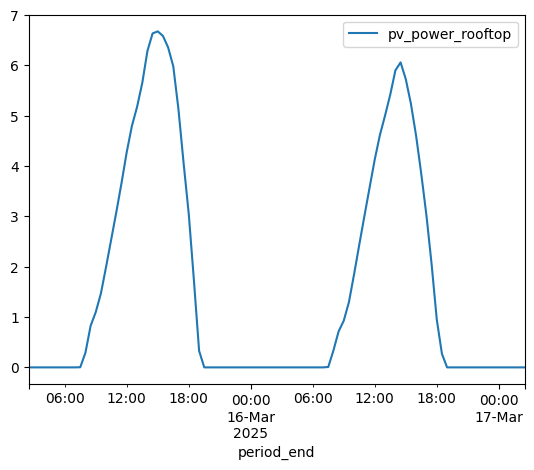

In [28]:
df = res_forecast.to_pandas()
df.index = df.index.tz_convert('Australia/Sydney')
df.plot()